In [1]:
import sys
print(sys.version)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

3.7.5 (v3.7.5:5c02a39a0b, Dec 27 2019, 11:41:00) 
[GCC 6.3.0 20170516]


In [5]:
class Gate(object):
    amount_of_qbits = 3
    amount_of_cbits = 1
    display_gate = False
    
    def print(self):
        print(self.circuit)
    
    def draw(self, output="mpl"):
        return self.circuit.draw(output=output)
    
    def prepare_initial_state(self, initial_state):
        for i in range(self.amount_of_qbits):
            if initial_state[i] == '1':
                self.circuit.x(i)
    
    def logic(self):
        raise NotImplementedError()
    
    def get_output_state(self):
        simulator = Aer.get_backend('statevector_simulator')
        job = execute(self.circuit, simulator)
        result = job.result()
        outputstate = result.get_statevector(self.circuit, decimals=3)    

        return outputstate
    
    @staticmethod
    def outputstate_to_bin(outputstate):
        l = np.log2(len(outputstate))
        index = np.where(outputstate != 0)[0][0]
        s = bin(index)[2:]
        s = '0'*int(l-len(s)) + s
        return s[::-1]
    
    def execute(self, state="110"):
        self.circuit = QuantumCircuit(self.amount_of_qbits, self.amount_of_cbits)
        self.prepare_initial_state(state)
        self.logic()
        
        if self.display_gate:
            self.print()
        
        return self.outputstate_to_bin(
            self.get_output_state()
        )
    
class AND(Gate):
    def logic(self):
        self.circuit.cswap(0,1,2)
        self.circuit.cnot(2,1)
        self.circuit.measure(2,0)

class AND2(Gate):
    def logic(self):
        self.circuit.ccx(0,1,2)
        self.circuit.measure(2,0)

class XOR(Gate):
    def logic(self):
        self.circuit.cnot(0,2)
        self.circuit.cnot(1,2)
        self.circuit.measure(2,0)

class XOR2(Gate):
    amount_of_qbits = 2
    def logic(self):
        self.circuit.cnot(0,1)
        self.circuit.measure(1,0)
        self.circuit.cnot(0,1)

class OR(Gate):
    def logic(self):
        self.circuit.x(0)
        self.circuit.x(1)
        self.circuit.ccx(0,1,2)
        self.circuit.x(2)
        # restore input bits
        self.circuit.x(0)
        self.circuit.x(1)
        
        self.circuit.measure(2,0)


In [3]:
# test the gates
a = AND()
x = XOR()
o = OR()
combinations = ["00", "01", "10", "11"]

print("AND")
for i in combinations:
    print(f"{i}0 : {a.execute(i+'0')}")
print("XOR")
for i in combinations:
    print(f"{i}0 : {x.execute(i+'0')}")
print("OR")
for i in combinations:
    print(f"{i}0 : {o.execute(i+'0')}")

AND
000 : 000
010 : 010
100 : 100
110 : 111
XOR
000 : 000
010 : 011
100 : 101
110 : 110
OR
000 : 000
010 : 011
100 : 101
110 : 111


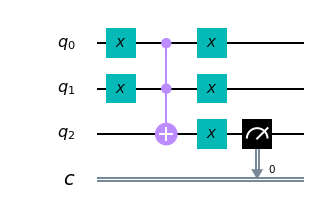

In [6]:
# plot the gate
temp = OR()
temp.execute('000')
temp.draw()
# temp.circuit.draw(output="mpl")